In [211]:
import kagglehub
import numpy as np
import pandas as pd
import engine
import nn
import importlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
importlib.reload(engine)
importlib.reload(nn)


<module 'nn' from '/Users/non/Desktop/expand_micrograd/parent_micrograd/micrograd/nn.py'>

In [212]:
X = load_digits()

X_train = X.data

print(len(X_train[0]))

64


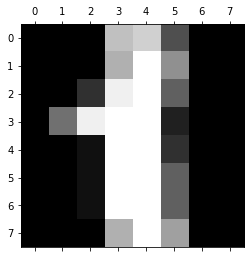

In [213]:
plt.matshow(X.images[1], cmap="gray")
plt.show()

In [218]:
auto = nn.AutoEncoder(64, 2, 8, engine.Value.sigmoid)

In [219]:
print(auto)

the encoder is 6 number of layers, 6036 number of parameters and the decoder is 6 number of layers, 6036 number of parameters activated with <function Value.sigmoid at 0x7f88860411f0>


In [193]:
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)

print(X_train[0])

[0.         0.         0.3125     0.8125     0.5625     0.0625
 0.         0.         0.         0.         0.8125     0.9375
 0.625      0.9375     0.3125     0.         0.         0.1875
 0.9375     0.125      0.         0.6875     0.5        0.
 0.         0.26666667 0.75       0.         0.         0.5
 0.53333333 0.         0.         0.35714286 0.5        0.
 0.         0.5625     0.57142857 0.         0.         0.25
 0.6875     0.         0.0625     0.75       0.4375     0.
 0.         0.125      0.875      0.3125     0.625      0.75
 0.         0.         0.         0.         0.375      0.8125
 0.625      0.         0.         0.        ]


In [197]:
importlib.reload(engine)
importlib.reload(nn)

def loss(batch_size):
    epsilon = 1e-8
    ri = np.random.permutation(X_train.shape[0])[:batch_size]
    Xb = X_train[ri]


    inputs = [list(map(engine.Value, xrow)) for xrow in Xb]

    outs = [auto(x) for x in inputs]
    
    print(len(outs))
    
    print(len(outs[0]))

    
    
    # scores = [i.sigmoid() for i in j for j in scores]
    
    combination = zip(scores, yb)
# 
    combination = [i for i in combination if not np.isnan(i[0].data)]
    

    Binary_Cross_Entropy = [(truth * ((y + epsilon).log()) + (1 - truth) * ((1 - y + epsilon).log())) for y, truth in combination]
    
    loss = sum(Binary_Cross_Entropy) * -(1/len(scores))
    
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in n.parameters()))
    
    
    total_loss = loss + reg_loss
    
    accuracy = [(yi > 0) == (scorei.data > 0) for scorei, yi in combination]
    
    return total_loss, sum(accuracy) / len(accuracy)

print(loss(2))
        

2
64


NameError: name 'j' is not defined

In [141]:
def forward_pass(batch_size):
    print(X_train.shape)
    epsilon = 1e-8
    ri = np.random.permutation(X_train.shape[0])[:batch_size]
    Xb = X_train[ri]
    
    for k in range(1):
        inputs = [list(map(engine.Value, xrow)) for xrow in Xb]
        
        encoded_scores = [encoder(input) for input in inputs]
        
        # print(encoded_scores)

        encoded_scores = [[i.sigmoid() for i in x] for x in encoded_scores]
        
    
    
        
        decoded_output = [decoder(p) for p in encoded_scores]
        
        print(decoded_output[0])
        
        
        break

        


print(forward_pass(32))

(1797, 64)
[Value(data=-0.5564046664846408, grad=0), Value(data=-1.7499763183601222, grad=0), Value(data=1.5015874246170844, grad=0), Value(data=1.9116168582123818, grad=0), Value(data=-1.9101299104865672, grad=0), Value(data=-4.122363733192071, grad=0), Value(data=-0.20815654035376754, grad=0), Value(data=1.4410392918197852, grad=0), Value(data=1.6511757830317721, grad=0), Value(data=0.4853430163912291, grad=0), Value(data=5.957460591011346, grad=0), Value(data=-0.5483633327710009, grad=0), Value(data=1.7095847162914537, grad=0), Value(data=1.2214770658917613, grad=0), Value(data=2.181815875949694, grad=0), Value(data=2.5206403859597777, grad=0), Value(data=1.5541398784263816, grad=0), Value(data=-2.869358622476838, grad=0), Value(data=-4.233180297861256, grad=0), Value(data=-3.759552062410487, grad=0), Value(data=0.8137505995986589, grad=0), Value(data=-0.7424752498175693, grad=0), Value(data=-2.3190076837758675, grad=0), Value(data=0.22967241953120698, grad=0), Value(data=-1.3113552

In [ ]:
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    # , node_attr={'rankdir': 'TB'})
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})

    for n in nodes:
        dot.node(name=str(id(n)), label="{ data %.4f | grad %.4f }" % (
            n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


hey = AutoEncoder(10, 2, Value.sigmoid)

dot = draw_dot(hey)

print(dot)